## **PIZZA RESTAURANT SALES - EDA**

**About Dataset**

Plato's Pizza is a Greek-inspired pizza place located in New Jersey, USA. The restaurant is looking for operations improvement, and they think a year worth of data would be helpful for this.

*Contents*

This pizza sales dataset make up 12 relevant features:

order_id: Unique identifier for each order placed by a table

order_details_id: Unique identifier for each pizza placed within each order (pizzas of the same type and size are kept in the same row, and the quantity increases)

pizza_id: Unique key identifier that ties the pizza ordered to its details, like size and price

quantity: Quantity ordered for each pizza of the same type and size

order_date: Date the order was placed (entered into the system prior to cooking & serving)

order_time: Time the order was placed (entered into the system prior to cooking & serving)

unit_price: Price of the pizza in USD

total_price: unit_price * quantity

pizza_size: Size of the pizza (Small, Medium, Large, X Large, or XX Large)

pizza_type: Unique key identifier that ties the pizza ordered to its details, like size and price

pizza_ingredients: ingredients used in the pizza as shown in the menu (they all include Mozzarella Cheese, even if not specified; and they all include Tomato Sauce, unless another sauce is specified)

pizza_name: Name of the pizza as shown in the menu

**Questions for Analysis**

1. What days and times do we tend to be busiest?

2. How many pizzas are we making during peak periods?

3. What are our best and worst-selling pizzas?

4. What's our average order value?

5. How well are we utilizing our seating capacity? (we have 15 tables and 60 seats)

**Import Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

**Loading Dataset**

In [3]:
df = pd.read_excel("/kaggle/input/pizza-sales/Data Model - Pizza Sales.xlsx")
df.head()

,order_details_id,order_id,pizza_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2,2,classic_dlx_m,1,2015-01-01,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3,2,five_cheese_l,1,2015-01-01,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4,2,ital_supr_l,1,2015-01-01,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5,2,mexicana_m,1,2015-01-01,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


**Exploring Some Information About The Dataset**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   order_details_id   48620 non-null  int64         
 1   order_id           48620 non-null  int64         
 2   pizza_id           48620 non-null  object        
 3   quantity           48620 non-null  int64         
 4   order_date         48620 non-null  datetime64[ns]
 5   order_time         48620 non-null  object        
 6   unit_price         48620 non-null  float64       
 7   total_price        48620 non-null  float64       
 8   pizza_size         48620 non-null  object        
 9   pizza_category     48620 non-null  object        
 10  pizza_ingredients  48620 non-null  object        
 11  pizza_name         48620 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(3), object(6)
memory usage: 4.5+ MB


In [5]:
df.shape

(48620, 12)

In [6]:
df.isnull().sum()

order_details_id     0
order_id             0
pizza_id             0
quantity             0
order_date           0
order_time           0
unit_price           0
total_price          0
pizza_size           0
pizza_category       0
pizza_ingredients    0
pizza_name           0
dtype: int64

In [7]:
df.describe()

,order_details_id,order_id,quantity,unit_price,total_price
count,48620.000000,48620.000000,48620.000000,48620.000000,48620.000000
mean,24310.500000,10701.479761,1.019622,16.494132,16.821474
std,14035.529381,6180.119770,0.143077,3.621789,4.437398
min,1.000000,1.000000,1.000000,9.750000,9.750000
25%,12155.750000,5337.000000,1.000000,12.750000,12.750000
50%,24310.500000,10682.500000,1.000000,16.500000,16.500000
75%,36465.250000,16100.000000,1.000000,20.250000,20.500000
max,48620.000000,21350.000000,4.000000,35.950000,83.000000


In [8]:
df["order_time"] = df["order_time"].astype("string")
df[["Hour", "Minute", "Second"]]= df["order_time"].str.split(":", expand=True)
df["Hour"].value_counts()

12    6543
13    6203
18    5359
17    5143
19    4350
16    4185
14    3521
20    3487
15    3170
11    2672
21    2528
22    1370
23      68
10      17
09       4
Name: Hour, dtype: Int64

**Data Visualization**

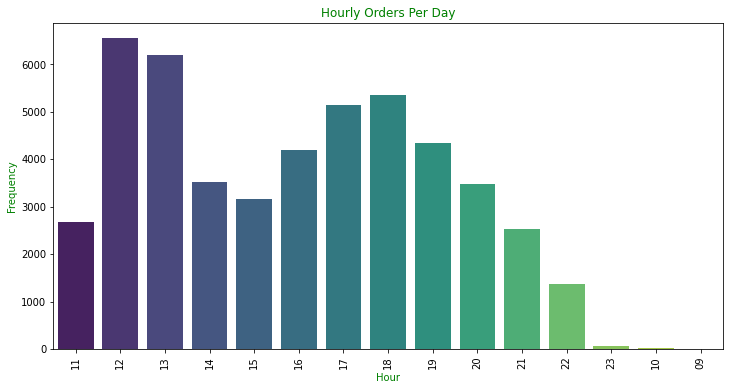

In [9]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.countplot(data=df,x="Hour",palette="viridis")
plt.xticks(rotation=90)
plt.xlabel("Hour",fontsize=10,color="green")
plt.ylabel("Frequency",fontsize=10,color="green")
plt.title('Hourly Orders Per Day',color="green")
plt.show()

Although this pizza shop opens 9am, the number of orders at 9 is almost non-existent. Customers ordered most during lunch and dinner hours.


In [10]:
df['order_year'] =pd.DatetimeIndex( df['order_date']).year
df['order_year'].value_counts()

2015    48620
Name: order_year, dtype: int64

Order years are 2015.

**Most Ordered Day In The Week**

In [11]:
df['order_dates'] = df['order_date'].dt.day_name()
df['order_dates'].value_counts()

Friday       8106
Saturday     7355
Thursday     7323
Wednesday    6797
Tuesday      6753
Monday       6369
Sunday       5917
Name: order_dates, dtype: int64

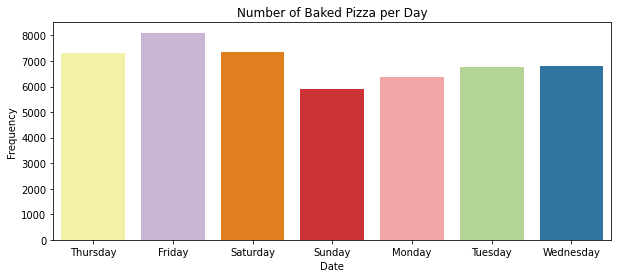

In [12]:
fig, ax = plt.subplots(figsize=(10, 4))
sns.countplot(data=df,x = "order_dates", palette ='Paired_r')
plt.xlabel("Date",fontsize=10,color="black")
plt.ylabel("Frequency",fontsize=10,color="black")
plt.title('Number of Baked Pizza per Day',color="black")
plt.show()

**Most Ordered Month In The Year**

In [15]:
df['order_month'] =pd.DatetimeIndex (df['order_date']).month
df.loc[(df['order_month'] ==1), 'order_month'] = 'January'
df.loc[(df['order_month'] ==2), 'order_month'] = 'February'
df.loc[(df['order_month'] ==3), 'order_month'] = 'March'
df.loc[(df['order_month'] ==4), 'order_month'] = 'April'
df.loc[(df['order_month'] ==5), 'order_month'] = 'May'
df.loc[(df['order_month'] ==6), 'order_month'] = 'June'
df.loc[(df['order_month'] ==7), 'order_month'] = 'July'
df.loc[(df['order_month'] ==8), 'order_month'] = 'August'
df.loc[(df['order_month'] ==9), 'order_month'] = 'September'
df.loc[(df['order_month'] ==10), 'order_month'] = 'October'
df.loc[(df['order_month'] ==11), 'order_month'] = 'November'
df.loc[(df['order_month'] ==12), 'order_month'] = 'December'
df['order_month'].value_counts()


July         4301
May          4239
March        4186
November     4185
January      4156
August       4094
April        4067
June         4025
February     3892
December     3859
September    3819
October      3797
Name: order_month, dtype: int64

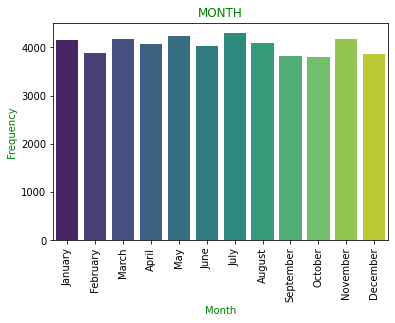

In [16]:
sns.countplot(data=df,x="order_month",palette="viridis")
plt.xticks(rotation=90)
plt.xlabel("Month",fontsize=10,color="green")
plt.ylabel("Frequency",fontsize=10,color="green")
plt.title("MONTH",color="green")
plt.show()

The busiest month throughtout the year are July, May and March. The month of July with the highest number of baked pizzas.

**Most Ordered Pizza Code**

In [17]:
df.pizza_id.value_counts()

big_meat_s        1811
thai_ckn_l        1365
five_cheese_l     1359
four_cheese_l     1273
classic_dlx_m     1159
                  ... 
mexicana_s         160
calabrese_s         99
ckn_alfredo_s       96
green_garden_l      94
the_greek_xxl       28
Name: pizza_id, Length: 91, dtype: int64

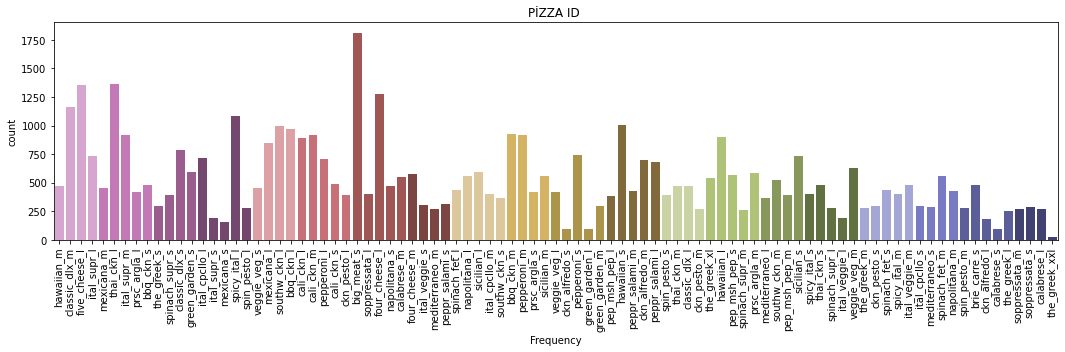

In [18]:
fig, ax = plt.subplots(figsize=(18, 4))
sns.countplot(data=df,x="pizza_id",palette="tab20b_r",ax=ax)
plt.xticks(rotation=90)
plt.xlabel("Pizza Id",fontsize=10,color="black")
plt.xlabel("Frequency",fontsize=10,color="black")
plt.title("PİZZA ID ",color="black")
plt.show()

"Big meat s" is the most ordered code. 

**Most Ordered Quantity**

In [19]:
df.quantity.value_counts()

1    47693
2      903
3       21
4        3
Name: quantity, dtype: int64

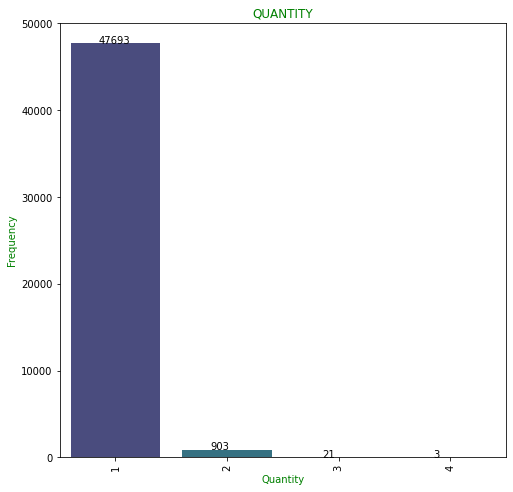

In [23]:
fig, ax = plt.subplots(figsize=(8, 8))
ax = sns.countplot(data=df,x="quantity",palette="viridis")
for p in ax.patches:
   ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.xticks(rotation=90)
plt.xlabel("Quantity",fontsize=10,color="Green")
plt.ylabel("Frequency",fontsize=10,color="Green")
plt.title("QUANTITY",color="Green")
plt.show()

The most ordered quantity of Pizza is 1 pieces, generally, when ordering 1 piece, at least 4 people ordered.

**What Size Of Pizza Do Customers Order for?**

In [24]:
df.pizza_size.value_counts()

L      18526
M      15385
S      14137
XL       544
XXL       28
Name: pizza_size, dtype: int64

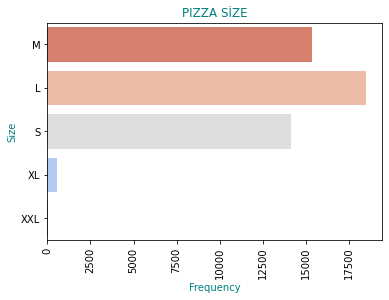

In [27]:
sns.countplot(data=df,y="pizza_size",palette="coolwarm_r")
plt.xticks(rotation=90)
plt.xlabel("Frequency",fontsize=10,color="Teal")
plt.ylabel("Size",fontsize=10,color="Teal")
plt.title("PIZZA SİZE",color="Teal")
plt.show()

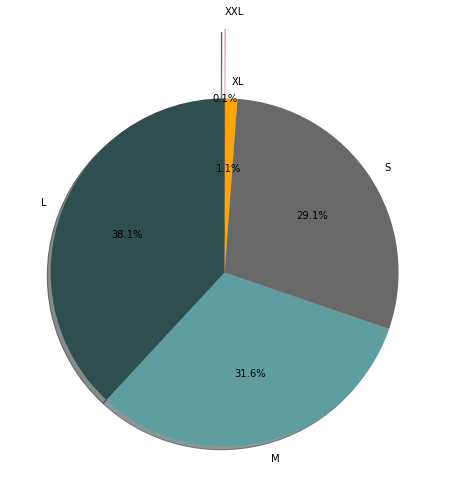

In [28]:
labels = df["pizza_size"].value_counts().index
sizes = df["pizza_size"].value_counts()
plt.figure(figsize = (8,8))

color = ["DarkSlateGrey","CadetBlue","DimGrey","orange","FireBrick"]
plt.pie(sizes, labels=labels, rotatelabels=False, autopct='%1.1f%%',colors=color,shadow=True, startangle=90,explode=(0,0,0,0,0.4))
plt.show()

In [29]:
fig=px.pie(df.groupby('pizza_size',as_index=False)['total_price'].count().sort_values(by='total_price',
                                                                                              ascending=False),names='pizza_size',
           values='total_price',color='pizza_size',hole=0.7,labels={'pizza_size':'pizza_size','total_price':'price'},
           template='ggplot2',title='<b>  Pizza Sizes')
fig.update_layout(title_x=0.5,legend=dict(orientation='h',yanchor='bottom',y=1.02,xanchor='right',x=1))

Customers ordered for large size Pizza the most.

**What Category Of Pizza Do Customers Order Most?**

In [30]:
df.pizza_category.value_counts()

Classic    14579
Supreme    11777
Veggie     11449
Chicken    10815
Name: pizza_category, dtype: int64

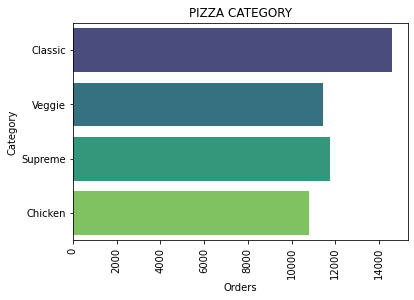

In [32]:
sns.countplot(data=df,y="pizza_category",palette="viridis")
plt.xticks(rotation=90)
plt.xlabel("Orders",fontsize=10,color="black")
plt.ylabel("Category",fontsize=10,color="black")
plt.title("PIZZA CATEGORY",color="black")
plt.show()

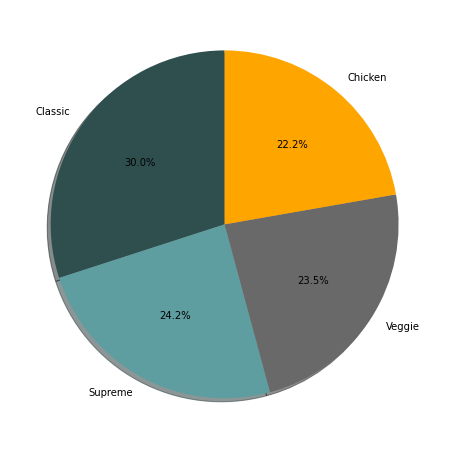

In [33]:
labels = df["pizza_category"].value_counts().index
sizes = df["pizza_category"].value_counts()
colors = ["DarkSlateGrey","CadetBlue","DimGrey","orange"]
plt.figure(figsize = (8,8))
plt.pie(sizes, labels=labels, rotatelabels=False, autopct='%1.1f%%',colors=colors,shadow=True, startangle=90)
plt.show()

Classic pizza is generally preferred.

**Most Ordered Pizza Name**

In [34]:
df.pizza_name.value_counts()

The Classic Deluxe Pizza                      2416
The Barbecue Chicken Pizza                    2372
The Hawaiian Pizza                            2370
The Pepperoni Pizza                           2369
The Thai Chicken Pizza                        2315
The California Chicken Pizza                  2302
The Sicilian Pizza                            1887
The Spicy Italian Pizza                       1887
The Southwest Chicken Pizza                   1885
The Four Cheese Pizza                         1850
The Italian Supreme Pizza                     1849
The Big Meat Pizza                            1811
The Vegetables + Vegetables Pizza             1510
The Mexicana Pizza                            1456
The Napolitana Pizza                          1451
The Spinach and Feta Pizza                    1432
The Prosciutto and Arugula Pizza              1428
The Pepper Salami Pizza                       1422
The Italian Capocollo Pizza                   1414
The Greek Pizza                

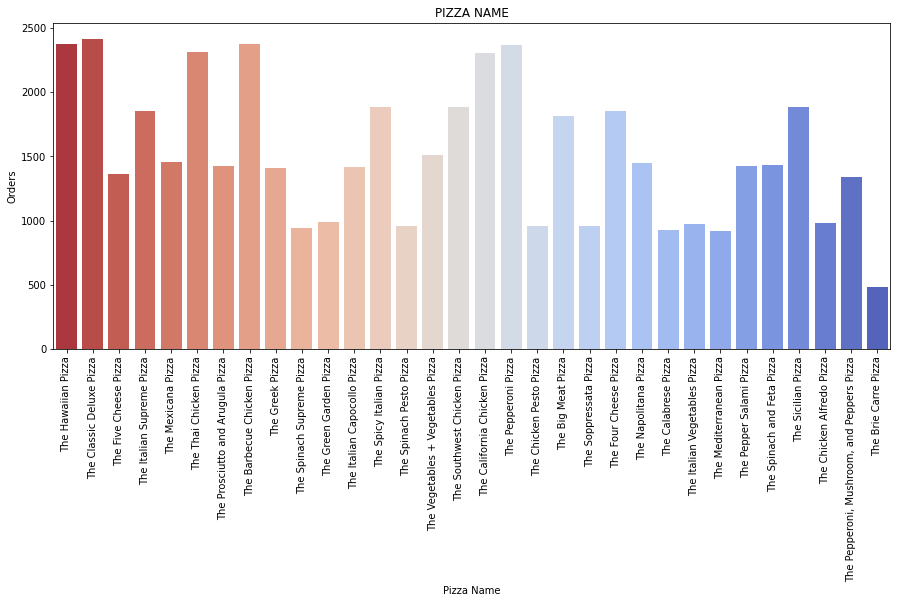

In [35]:
fig, ax = plt.subplots(figsize=(15, 6))
sns.countplot(data=df,x="pizza_name",palette="coolwarm_r")
plt.xticks(rotation=90)
plt.xlabel("Pizza Name",fontsize=10,color="black")
plt.ylabel("Orders",fontsize=10,color="black")
plt.title("PIZZA NAME",color="black")
plt.show()

The Classic Deluxe Pizza,The Barbecue Chicken Pizza and The Hawaiian Pizza are the three most ordered Pizza. 

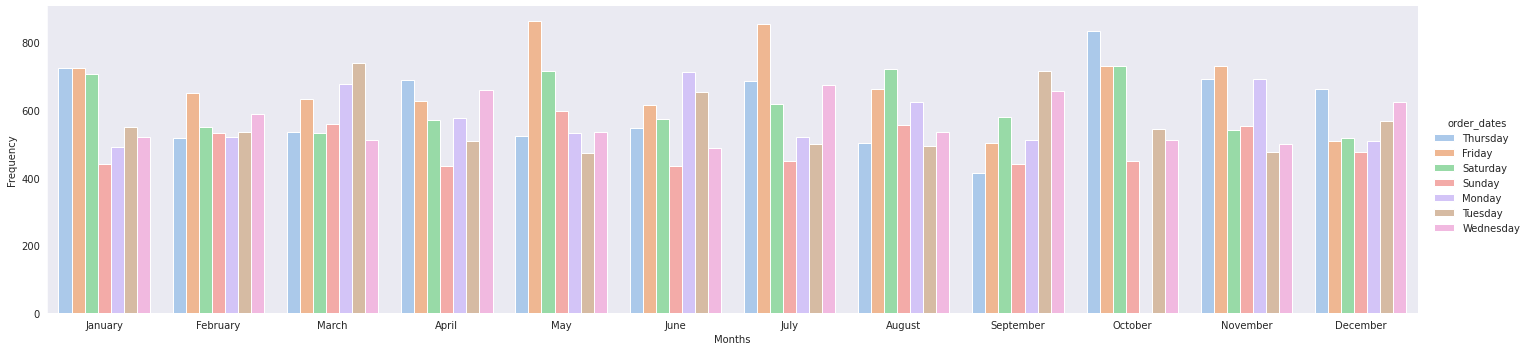

In [37]:
with sns.axes_style('dark'):
    g = sns.catplot(x="order_month", data=df, aspect=4.0, kind='count',hue='order_dates',palette="pastel")
g.set_ylabels('Frequency')
g.set_xlabels("Months")
plt.show()


In [38]:
joint_data=df.sort_values(by='total_price', ascending=False)

top_rated=joint_data[:]
fig =px.sunburst(
    top_rated,
    path=['pizza_category',"pizza_size"],
    values='total_price',
    color='total_price')
fig.show()

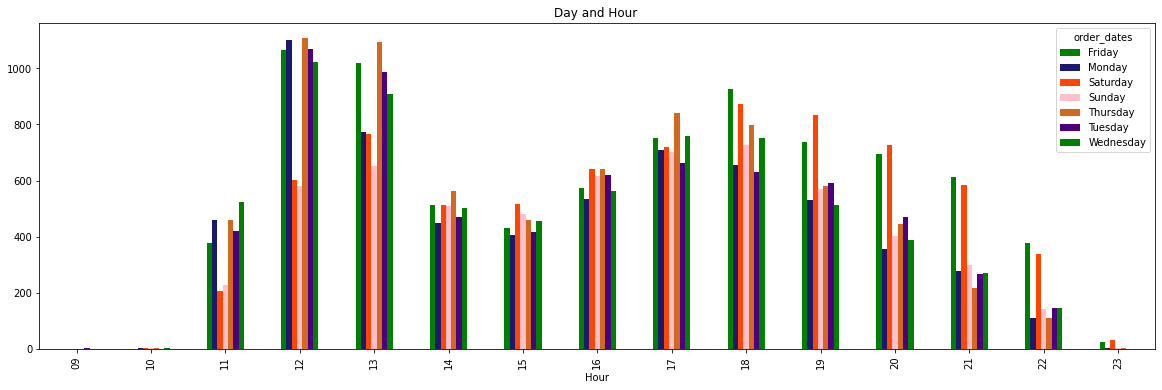

In [39]:
pd.crosstab(df["Hour"], df["order_dates"]).plot(kind="bar", figsize=(20, 6),
                                                color=["Green","MidnightBlue","OrangeRed","pink","Chocolate","indigo"],
                                                title="Day and Hour ")
plt.show()

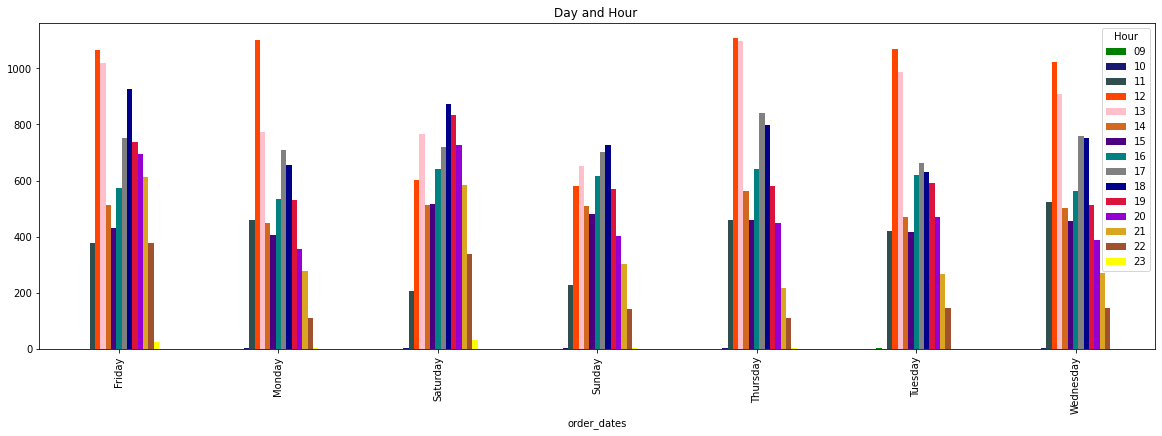

In [40]:
pd.crosstab(df["order_dates"], df["Hour"]).plot(kind="bar", figsize=(20, 6),
                                                color=["Green","MidnightBlue","DarkSlateGrey","OrangeRed","pink","Chocolate","indigo","Teal","Grey","DarkBlue","Crimson","DarkViolet","GoldenRod","Sienna","Yellow"],
                                                title="Day and Hour ")
plt.show()

In [41]:
df1 = df.groupby(["pizza_size","pizza_category"],as_index=False)[['total_price']].median().rename(columns={'total_price':'price'})
fig = px.treemap(df1, path = [px.Constant("all"), "pizza_size","pizza_category"], 
                 values   ='price', color='pizza_size',
                 color_discrete_map={'(?)':'lightgrey', 'Lunch':'gold', 'Dinner':'darkblue'})
fig.update_layout(margin  = dict(t=50, l=25, r=25, b=25))
fig.show()


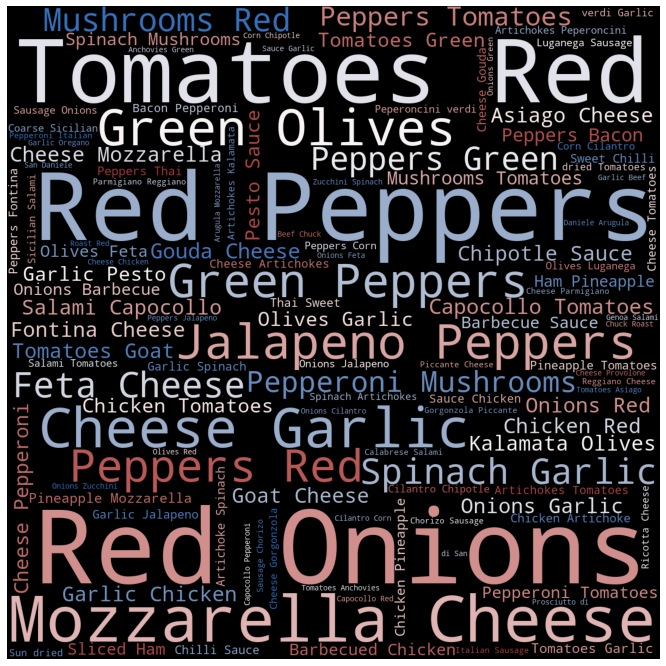

In [42]:
text = ' '.join(df['pizza_ingredients'])

plt.rcParams['figure.figsize'] = (12,12)
wordcloud = WordCloud(background_color = 'black',colormap='vlag', width = 1200,  height = 1200, max_words = 121).generate(text)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
plt.show()

Tomatoes, red peppers and red onions are usually found in all pizzas.

In [43]:
fig = px.scatter(df, x = "pizza_size", y = "total_price", color = "pizza_size")
fig.show()

**Analysis Phase**

*1. What days and times do we tend to be busiest?*

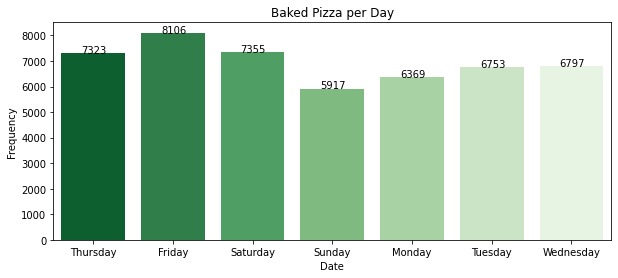

In [44]:
fig, ax = plt.subplots(figsize=(10, 4))
ax = sns.countplot(data=df,x = "order_dates", palette ='Greens_r')
for p in ax.patches:
   ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

plt.xlabel("Date",fontsize=10,color="black")
plt.ylabel("Frequency",fontsize=10,color="black")
plt.title('Baked Pizza per Day',color="black")
plt.show()

*2. How many pizzas are we making during peak periods*

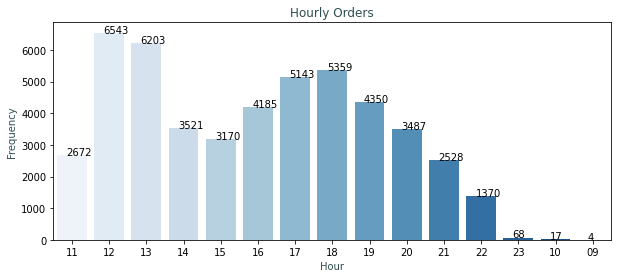

In [45]:
fig, ax = plt.subplots(figsize=(10, 4))
ax = sns.countplot(data=df,x = "Hour", palette ='Blues')
for p in ax.patches:
   ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

plt.xlabel("Hour",fontsize=10,color="DarkSlateGrey")
plt.ylabel("Frequency",fontsize=10,color="DarkSlateGrey")
plt.title('Hourly Orders',color="DarkSlateGrey")
plt.show()

From these chart, We get some information that we have two peaks when it comes to sales during the day. We can see an increase in the morning, around 11:30am, and it reaches its highest peak at noon (12pm) with a total of 6,776 pizzas baked, which coincides with lunch hours. The second peak is for dinner time, at 6:00pm with a total of 5,417 pizzas, in a whole year.

*3. What are our best and worst selling pizzas?*

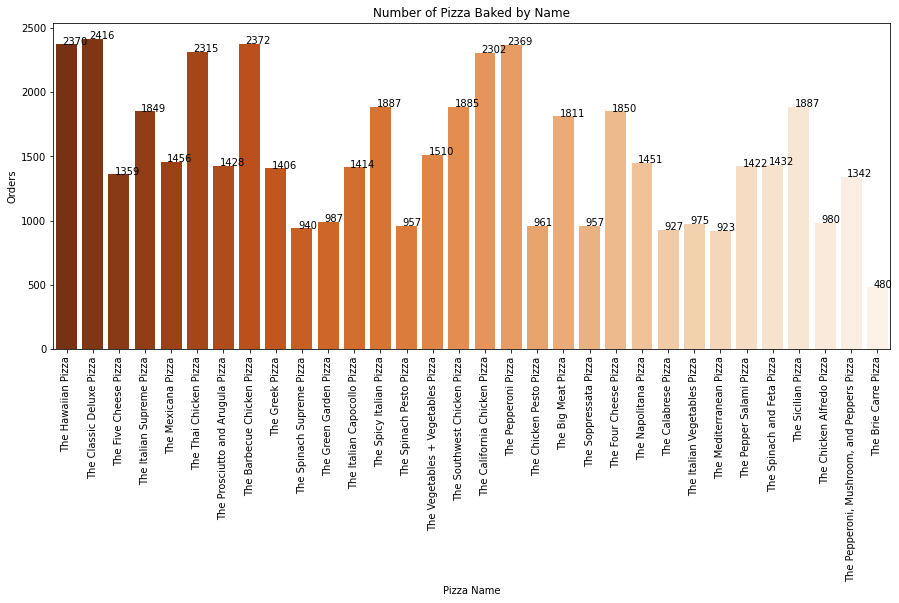

In [46]:
fig, ax = plt.subplots(figsize=(15, 6))
ax = sns.countplot(data=df,x="pizza_name",palette="Oranges_r")
for p in ax.patches:
   ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

plt.xticks(rotation=90)
plt.xlabel("Pizza Name",fontsize=10,color="black")
plt.ylabel("Orders",fontsize=10,color="black")
plt.title("Number of Pizza Baked by Name",color="black")
plt.show()

The Hawaiian, the Classic Deluxe, and the Barbecue Chicken pizzas are the most sold pizzas, being the Classic Deluxe Pizza the public's favorite.
On the other hand, the Brie Carre Pizza is the least ordered from the menu.

*4. What's our average order value?* 

In [47]:
df['total_price'].mean()

16.821473673385437

In [48]:
df["quantity"].mean()

1.0196215549156726

In [49]:
df['quantity'].sum()

49574

In [50]:
df["total_price"].sum()

817860.05

In [51]:
df["total_price"].max()

83.0

From all of this statistical data, we can say that a total of 49,574 pizzas were baked throughout the year, which translates to 817,860.05 dollars on total sales.

As an answer to the question, customers buy an average of 1 pizza, and spend around 16.82 dollars per purchase.

*5. How well is the restaurant utilizing its seating capacity?*

In [52]:
conditions = [
    (df['pizza_size'] =='S'),
    (df['pizza_size'] =='M') | (df['pizza_size']== 'L'),
    (df['pizza_size']== 'XL') | (df['pizza_size']== 'XXL'),
]

values = [0.25, 0.50, 1]

df['Utilization'] = np.select(conditions, values)
df['Total_Util'] = df['Utilization']* df['quantity']

day_hour= df.groupby(['order_date','order_dates','order_month', 'Hour'])['Total_Util'].sum().reset_index().sort_values(['order_date','Hour'])
day_hour['PCT_util']= day_hour['Total_Util']*100/15
day_hour.head()

,order_date,order_dates,order_month,Hour,Total_Util,PCT_util
0,2015-01-01,Thursday,January,11,3.00,20.000000
1,2015-01-01,Thursday,January,12,6.25,41.666667
2,2015-01-01,Thursday,January,13,14.75,98.333333
3,2015-01-01,Thursday,January,14,6.50,43.333333
4,2015-01-01,Thursday,January,15,5.75,38.333333


Text(0.5, 1.0, 'Utilization')

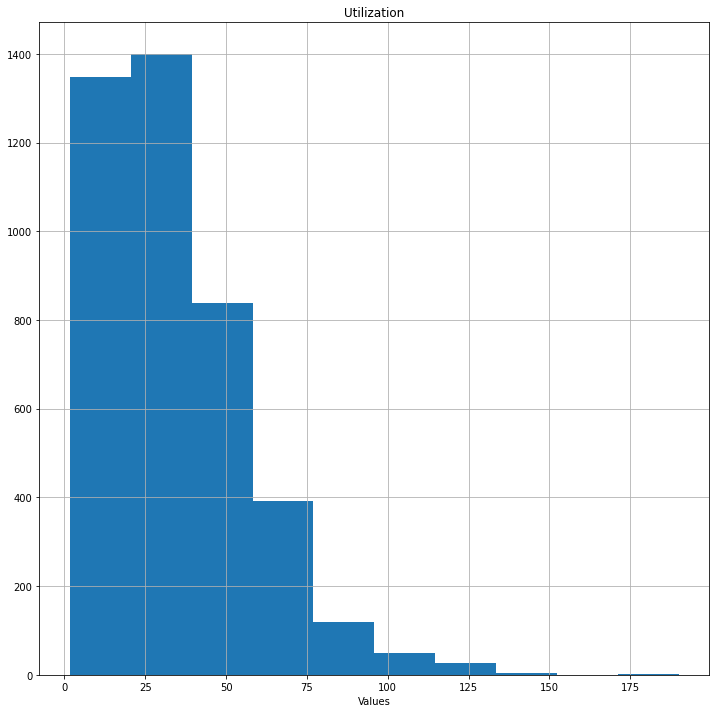

In [53]:
day_hour['PCT_util'].hist()
plt.xlabel("Values")
plt.title("Utilization")

This shows that most of the time about 25 to 50% of the sit gets utilised.

**RESULT**

📌Although this pizza shop opens 9am, the number of orders at 9 is almost non-existent,It is usually busy during lunch and dinner hours.

📌The number of orders is high on Fridays.

📌Order years are 2015.

📌The month of July, March, May is the 3 most ordered month in the year 2015.

📌"Big meat s" is the most ordered code.

📌The most ordered quantity of pizza is 1 pieces and generally, when ordering 1 piece, at least 4 people are ordered.

📌Customers ordered for Large size pizza the most.

📌Classic pizza is generally preferred.

📌Orders increase on Friday and Saturday.

📌Tomatoes, red peppers and red onions are usually found in all pizzas.
